# Compute the F-I Curve

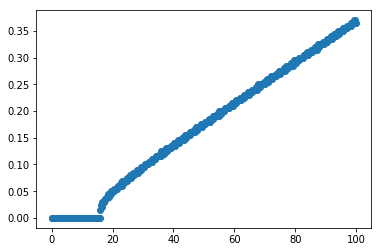

In [5]:


import numpy as np
import matplotlib.pyplot as plt

#########################################Define functions

def conductance(g_ex, delta_t, tau_ex):
    g_ex_new = g_ex - ((g_ex*delta_t)/tau_ex)
    return g_ex_new

def voltage(v, delta_t, taum, gl, El, g_ex, Eex, I):
    final_voltage = v + (delta_t/taum)*(-gl*(v-El)  + I) #- g_ex*(v-Eex)
    return final_voltage


#########################################Define parameters


taum = 10               # Membrane time constant
gl = 1                 # Leak conductance
g_ex=0               # Excitatory conductance
El = -70               # Leak potential
Eex = 0                # Excitaory potential
tau_ex = 1           # Synaptic time constant
v_th = -54             # Threshold
v_reset = -80          # Reset
#v_apv=20;              # Peak action potential
delta_t= 0.01           # time step
spike_count = 0


###Define time vector parameters
total_time_steps = 20000
total_time = delta_t*total_time_steps

# Define Current parameters
total_current_steps= 500;
Ivec=np.linspace(0,100,total_current_steps)

#initialize variables
firing_rate = np.zeros(total_current_steps)

#Initial condition
v = -60


######################################### Run loop

for j in range(total_current_steps):
    I=Ivec[j]
    #spikes=[];
    spikes_count=0
    for i in range(total_time_steps):
        t=i*delta_t

        # Compute the time evolved voltages
        if  v> v_th:
            v_new = v_reset
            #spikes.append(t)
            spikes_count+=1
        else:
           # g_ex_new = conductance(g_ex, delta_t, tau_ex)
            v_new = voltage(v, delta_t, taum, gl, El, 0, Eex, I)
        v = v_new
        #g_ex= g_ex_new
        
        # Compute the time evolved voltages
    firing_rate[j]=spikes_count/total_time;

    
fig,ax=plt.subplots(1)
ax.plot(Ivec,firing_rate,'o')
plt.show()
ax.set_xlabel('I')
ax.set_ylabel('Firing rate')
#ax.legend(['HH','LIF'])
fig.savefig('FICurve-LIF.pdf')    

# Monitor the Voltage

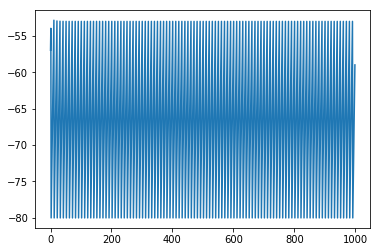

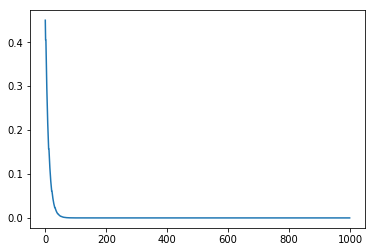

In [39]:
import numpy as np
import matplotlib.pyplot as plt

#########################################Define functions

def conductance(g_ex, delta_t, tau_ex):
    g_ex_new = g_ex - ((g_ex*delta_t)/tau_ex)
    return g_ex_new

def voltage(v, delta_t, cm, gl, El, g_ex, Eex, I):
    final_voltage = v + (delta_t/cm)*(-gl*(v-El) - g_ex*(v-Eex)+ I) 
    return final_voltage


#########################################Define parameters


cm = 10                # Capacitance
gl = 1                 # Leak conductance
g_ex=0.5               # Excitatory conductance
El = -70               # Leak potential
Eex = 0                # Excitaory potential
tau_ex = 0.1            # Synaptic time constant
v_th = -54             # Threshold
v_reset = -80          # Reset
v_apv=20;              # Peak action potential
delta_t= 0.01           # time step
spike_count = 0


###Define time vector parameters
total_time_steps = 1000
total_time = delta_t*total_time_steps

# Define Current parameters
total_current_steps= 100;
Ivec=np.linspace(0,10,total_current_steps)

#initialize variables
firing_rate = np.zeros(total_current_steps)
v_monitor=np.zeros(total_time_steps)
g_ex_monitor=np.zeros(total_time_steps)

#Initial condition
v = -60


######################################### Run loop


I=3
spikes_count=0
for i in range(total_time_steps):
    t=i*delta_t

    # Compute the time evolved voltages
    if  v> v_th:
        v_new = v_reset
        #spikes.append(t)
        spikes_count+=1
    else:
        g_ex_new = conductance(g_ex, delta_t, tau_ex)
        v_new = voltage(v, delta_t, cm, gl, El, g_ex_new, Eex, I)
    v = v_new
    g_ex= g_ex_new

    # Monitor variables
    v_monitor[i]=v
    g_ex_monitor[i]=g_ex



    
fig,ax=plt.subplots(1)
ax.plot(range(total_time_steps),v_monitor)
plt.show()


    
fig,ax=plt.subplots(1)
ax.plot(range(total_time_steps),g_ex_monitor)
plt.show()


